In [12]:
# binarization / threshold
# marginalia / foot notes
import cv2
import PIL
from PIL import Image 
import pytesseract


In [13]:
im_file_path = r'.\\Zzal.jpg'
im = Image.open(im_file_path)
# im.show()
# im.rotate(90).show()
# im.rotate(180).show()
# im.save("temp\Zzal.jpg")

## 00: Opening an Image

In [14]:
import cv2
from matplotlib import pyplot as plt
image_file = '.\Zzal.jpg'
img = cv2.imread(image_file)

In [15]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    
    if len(im_data.shape) == 3:
        height, width, depth = im_data.shape
    else:
        height, width = im_data.shape
        depth = 1
    
    figsize = width / float(dpi), height / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis("off")
    
    if depth == 1:
        ax.imshow(im_data, cmap="gray")
    else:
        ax.imshow(im_data)
    
    plt.show()

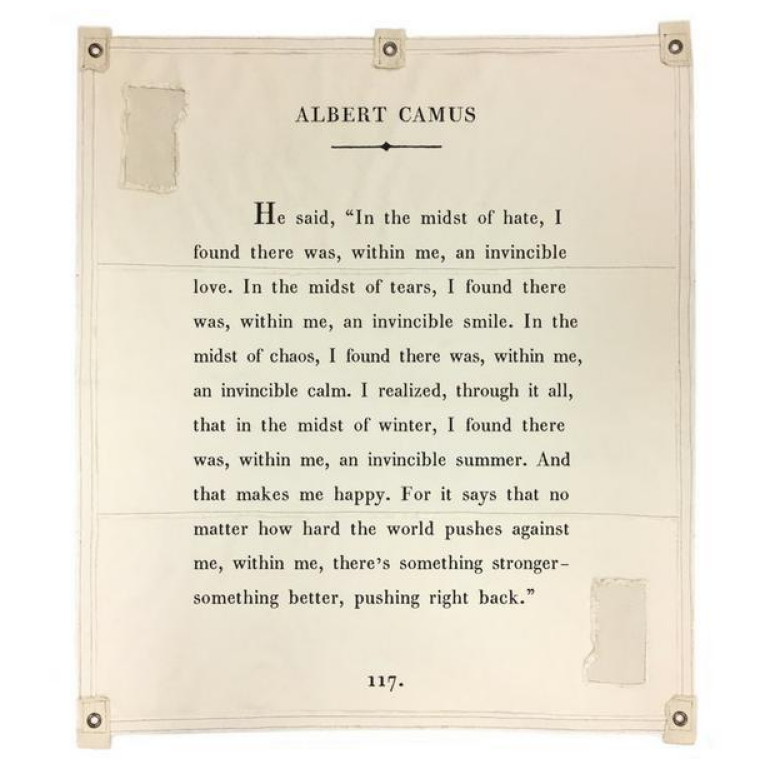

In [16]:
display(image_file)

## 01: Inverted Images

In [17]:
inverted_image = cv2.bitwise_not(img)
cv2.imwrite('temp\inverted.jpg', inverted_image)

True

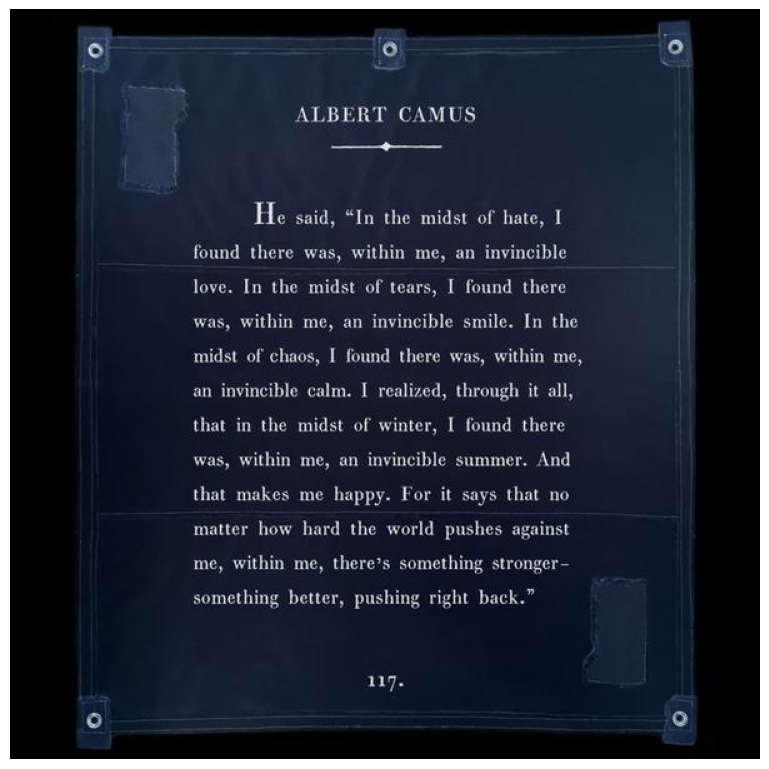

In [18]:
display('temp\inverted.jpg')

## 02: Rescaling

## 03: Binarization

In [19]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [20]:
gray_image = grayscale(img)
cv2.imwrite('temp\gray.jpg', gray_image)

True

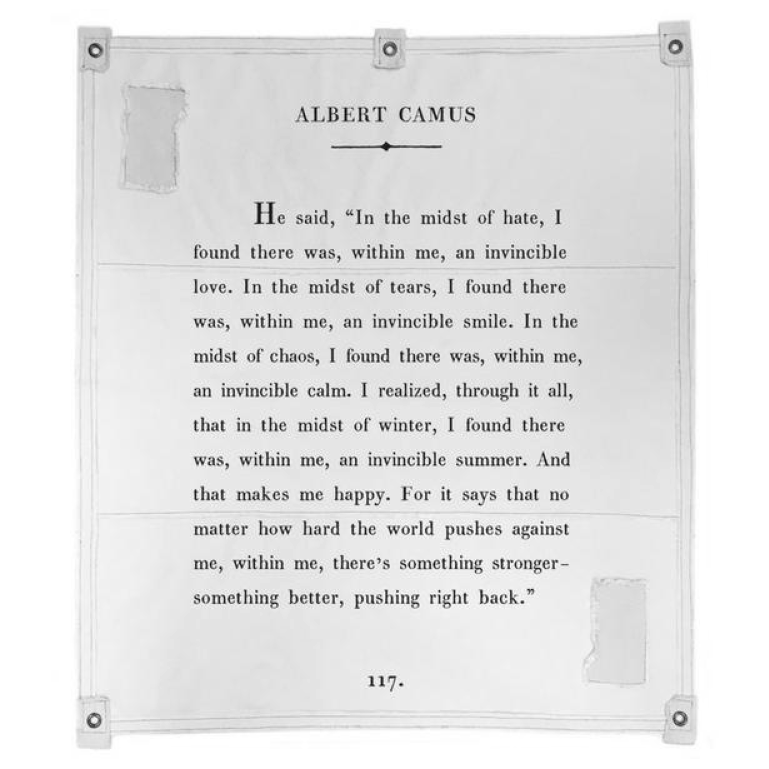

In [21]:
display('temp\gray.jpg')

In [22]:
thresh, im_bw = cv2.threshold(gray_image, 200, 250, cv2.THRESH_BINARY)
cv2.imwrite('temp/bw_image.jpg', im_bw)

True

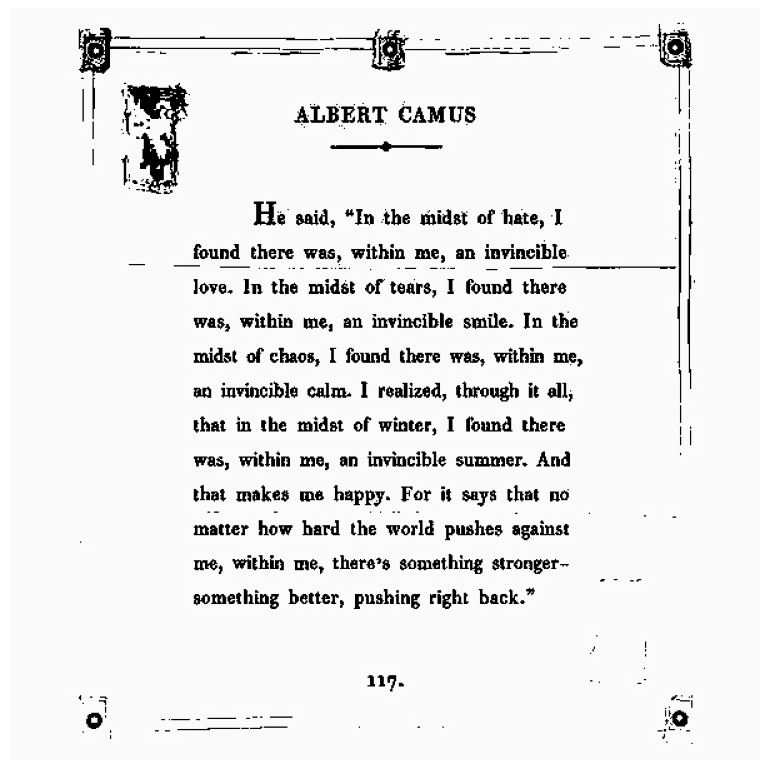

In [23]:
display('temp/bw_image.jpg')

## 04: Noise Removal

In [24]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [25]:
no_noise = noise_removal(im_bw)
cv2.imwrite('temp/no_noise.jpg', no_noise)

True

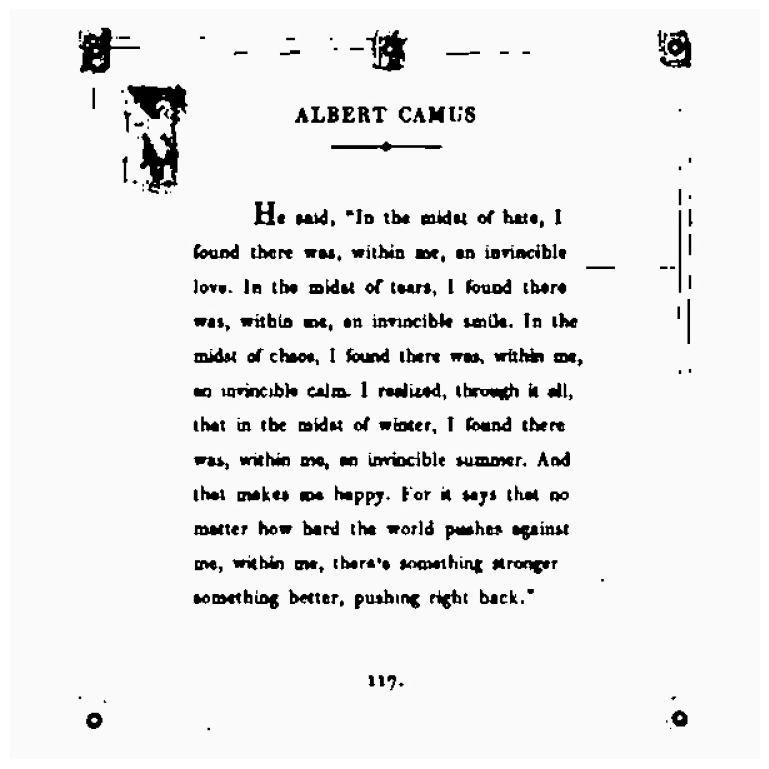

In [26]:
display('temp/no_noise.jpg')

## 05: Dilation and Erosion

In [27]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.erode(image, kernel, iterations = 1)
    image = cv2.bitwise_not(image)
    return (image)

In [28]:
eroded_image = thin_font(no_noise)
cv2.imwrite('temp/eroded_image.jpg', eroded_image)

True

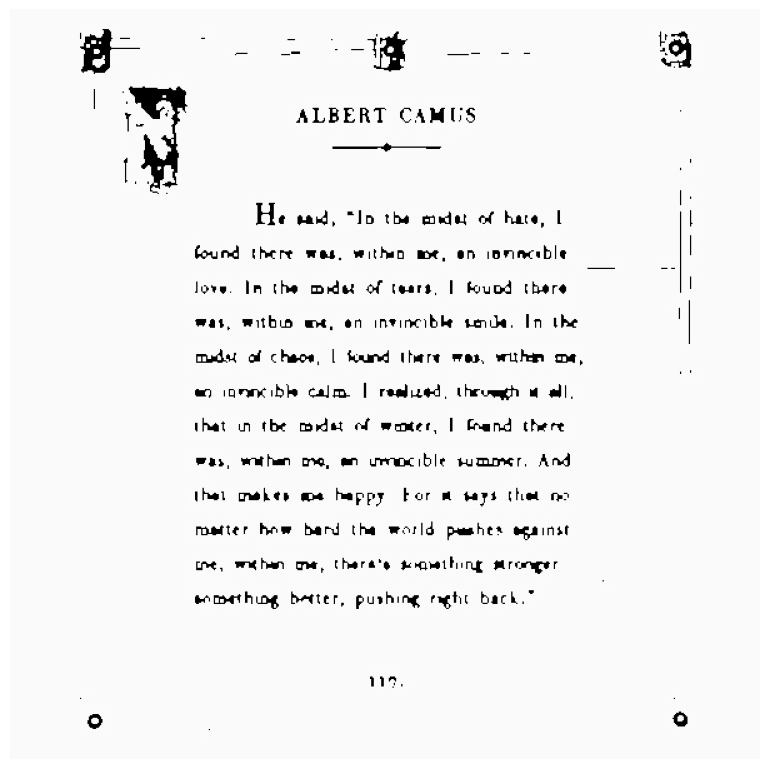

In [29]:
display('temp/eroded_image.jpg')

In [30]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.dilate(image, kernel, iterations = 1)
    image = cv2.bitwise_not(image)
    return (image)

In [31]:
dilated_image = thick_font(no_noise)
cv2.imwrite('temp/dilated_image.jpg', dilated_image)

True

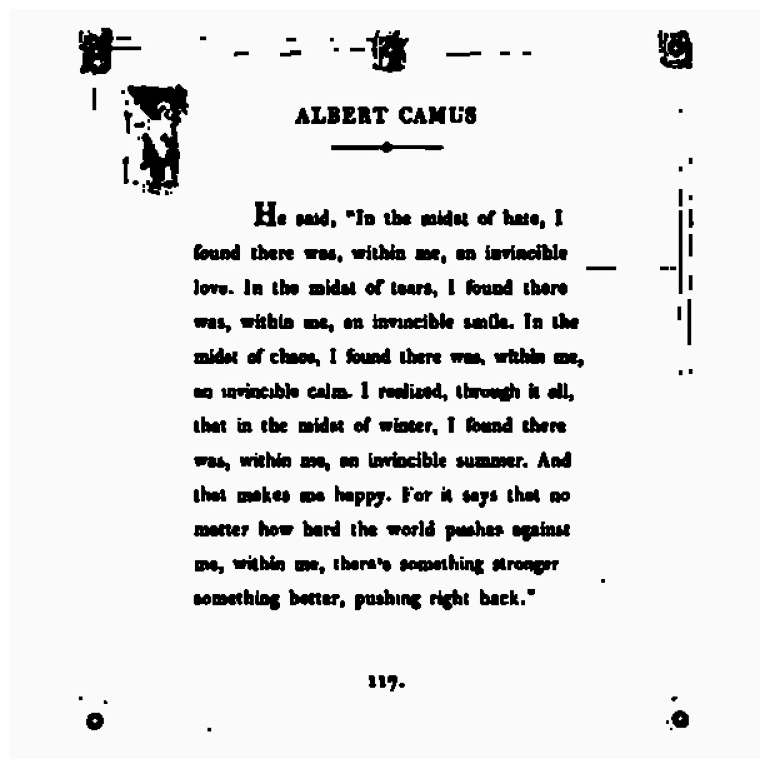

In [32]:
display('temp/dilated_image.jpg')

## 6. Rotation / Deskweing

In [33]:
import os
import cv2
import numpy as np

# Use the current working directory to construct the file path
file_path = os.path.join(os.getcwd(), 'page_01_rotated.jpg')
output_path = os.path.join(os.getcwd(), 'rotated_fixed.jpg')

print(f"Attempting to load image from: {file_path}")

# Load the image
new = cv2.imread(file_path)

if new is None:
    print(f"Error: Image not loaded. Please check if the file exists at: {file_path}")
else:
    print("Image loaded successfully")
    print(f"Image shape: {new.shape}")
    
    # Your existing functions (getSkewAngle, rotateImage, deskew) go here
    # ...

    # Apply deskew
    fixed = deskew(new)
    
    # Save the result
    cv2.imwrite(output_path, fixed)
    print(f"Deskewed image saved to: {output_path}")

Attempting to load image from: c:\Users\user\Documents\GitHub\ML\ML\OCR\page_01_rotated.jpg
Image loaded successfully
Image shape: (1322, 980, 3)


NameError: name 'deskew' is not defined

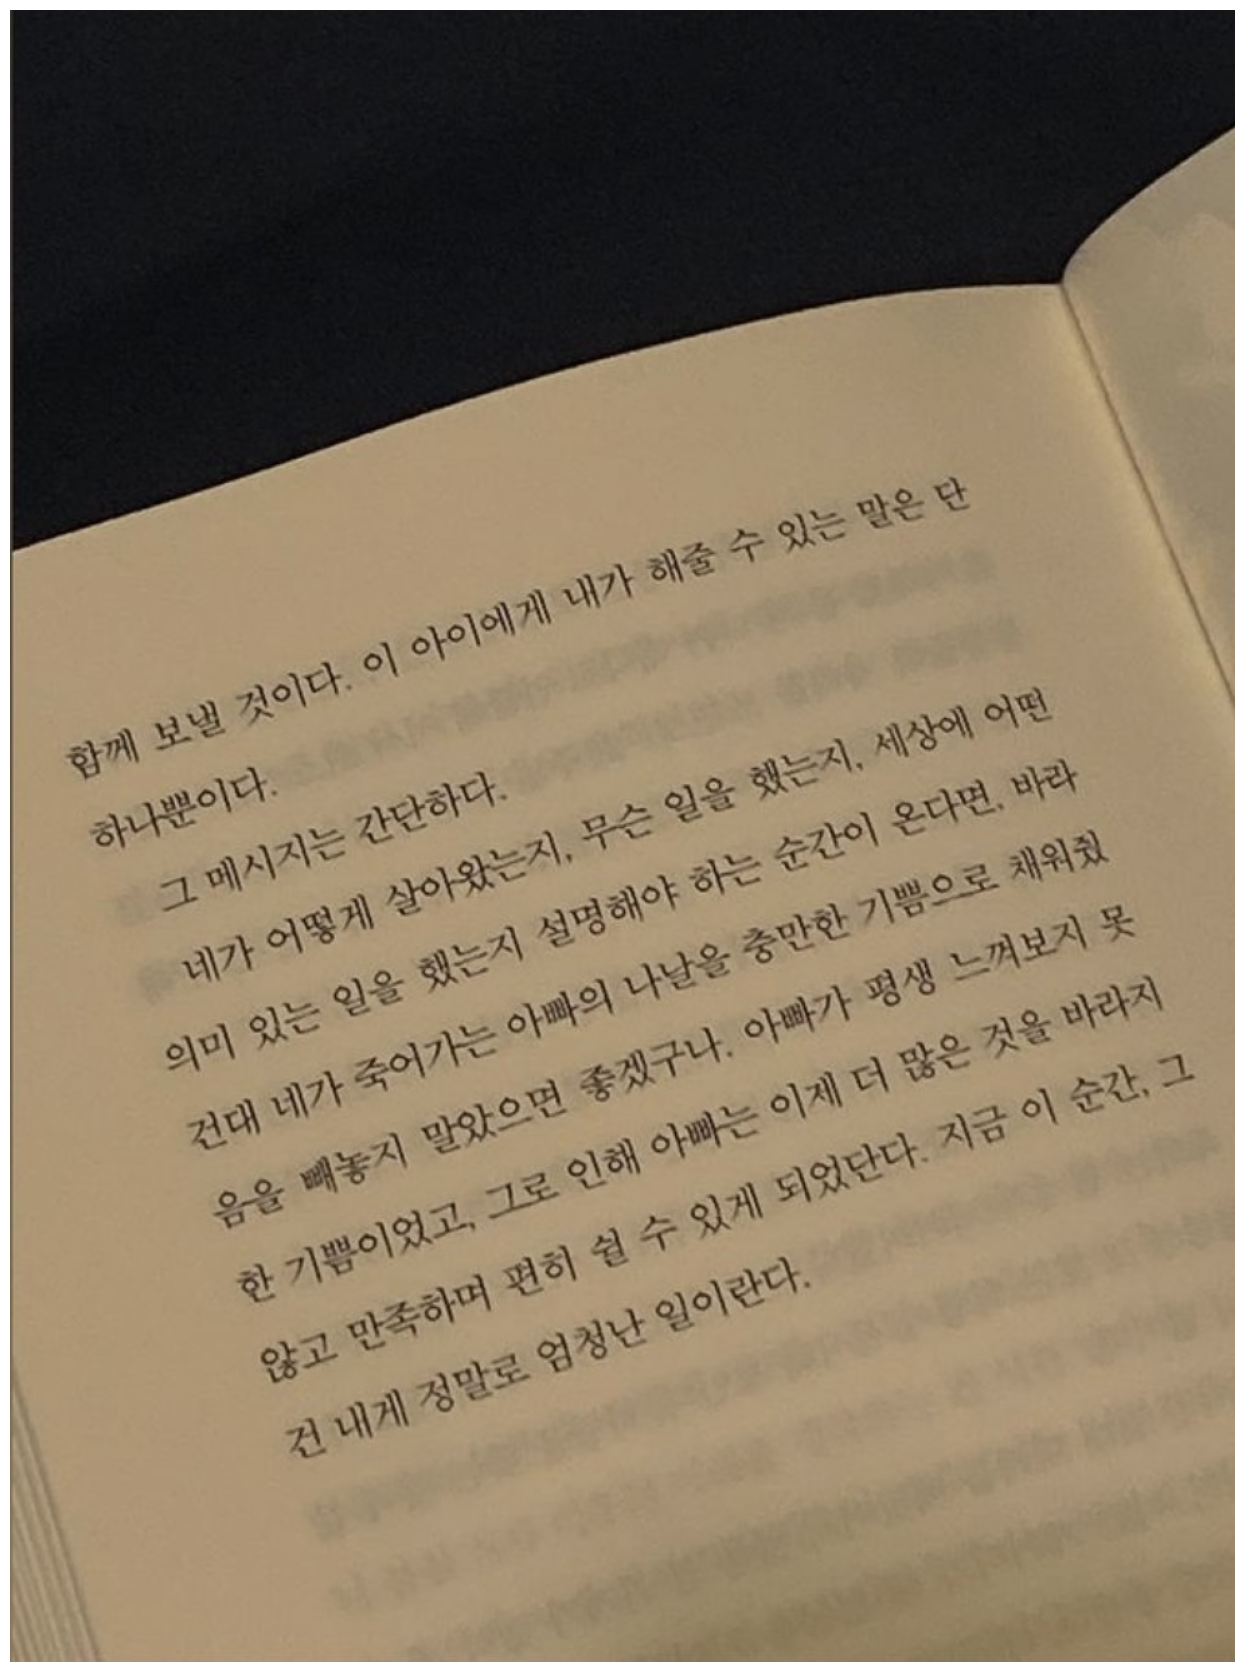

In [34]:
display("./page_01_rotated.JPG")

In [35]:
#https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df
import numpy as np

def getSkewAngle(cvImage) -> float:
    # Prep image, copy, convert to gray scale, blur, and threshold
    newImage = cvImage.copy()
    gray = cv2.cvtColor(newImage, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9, 9), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    # Apply dilate to merge text into meaningful lines/paragraphs.
    # Use larger kernel on X axis to merge characters into single line, cancelling out any spaces.
    # But use smaller kernel on Y axis to separate between different blocks of text
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilate = cv2.dilate(thresh, kernel, iterations=2)

    # Find all contours
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key = cv2.contourArea, reverse = True)
    for c in contours:
        rect = cv2.boundingRect(c)
        x,y,w,h = rect
        cv2.rectangle(newImage,(x,y),(x+w,y+h),(0,255,0),2)

    # Find largest contour and surround in min area box
    largestContour = contours[0]
    print (len(contours))
    minAreaRect = cv2.minAreaRect(largestContour)
    cv2.imwrite("temp/boxes.jpg", newImage)
    # Determine the angle. Convert it to the value that was originally used to obtain skewed image
    angle = minAreaRect[-1]
    if angle < -45:
        angle = 90 + angle
    return -1.0 * angle
    
# Rotate the image around its center
def rotateImage(cvImage, angle: float):
    newImage = cvImage.copy()
    (h, w) = newImage.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return newImage

In [36]:
# Deskew image
def deskew(cvImage):
    angle = getSkewAngle(cvImage)
    return rotateImage(cvImage, -1.0 * angle)

In [37]:
new = cv2.imread('OCR/page_01_rotated.jpg')
if new is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    fixed = deskew(new)
    cv2.imwrite("temp/rotated_fixed.jpg", fixed)

Error: Image not loaded. Please check the file path.


In [38]:
fixed = deskew(new)
cv2.imwrite("temp/rotated_fixed.jpg", fixed)

AttributeError: 'NoneType' object has no attribute 'copy'

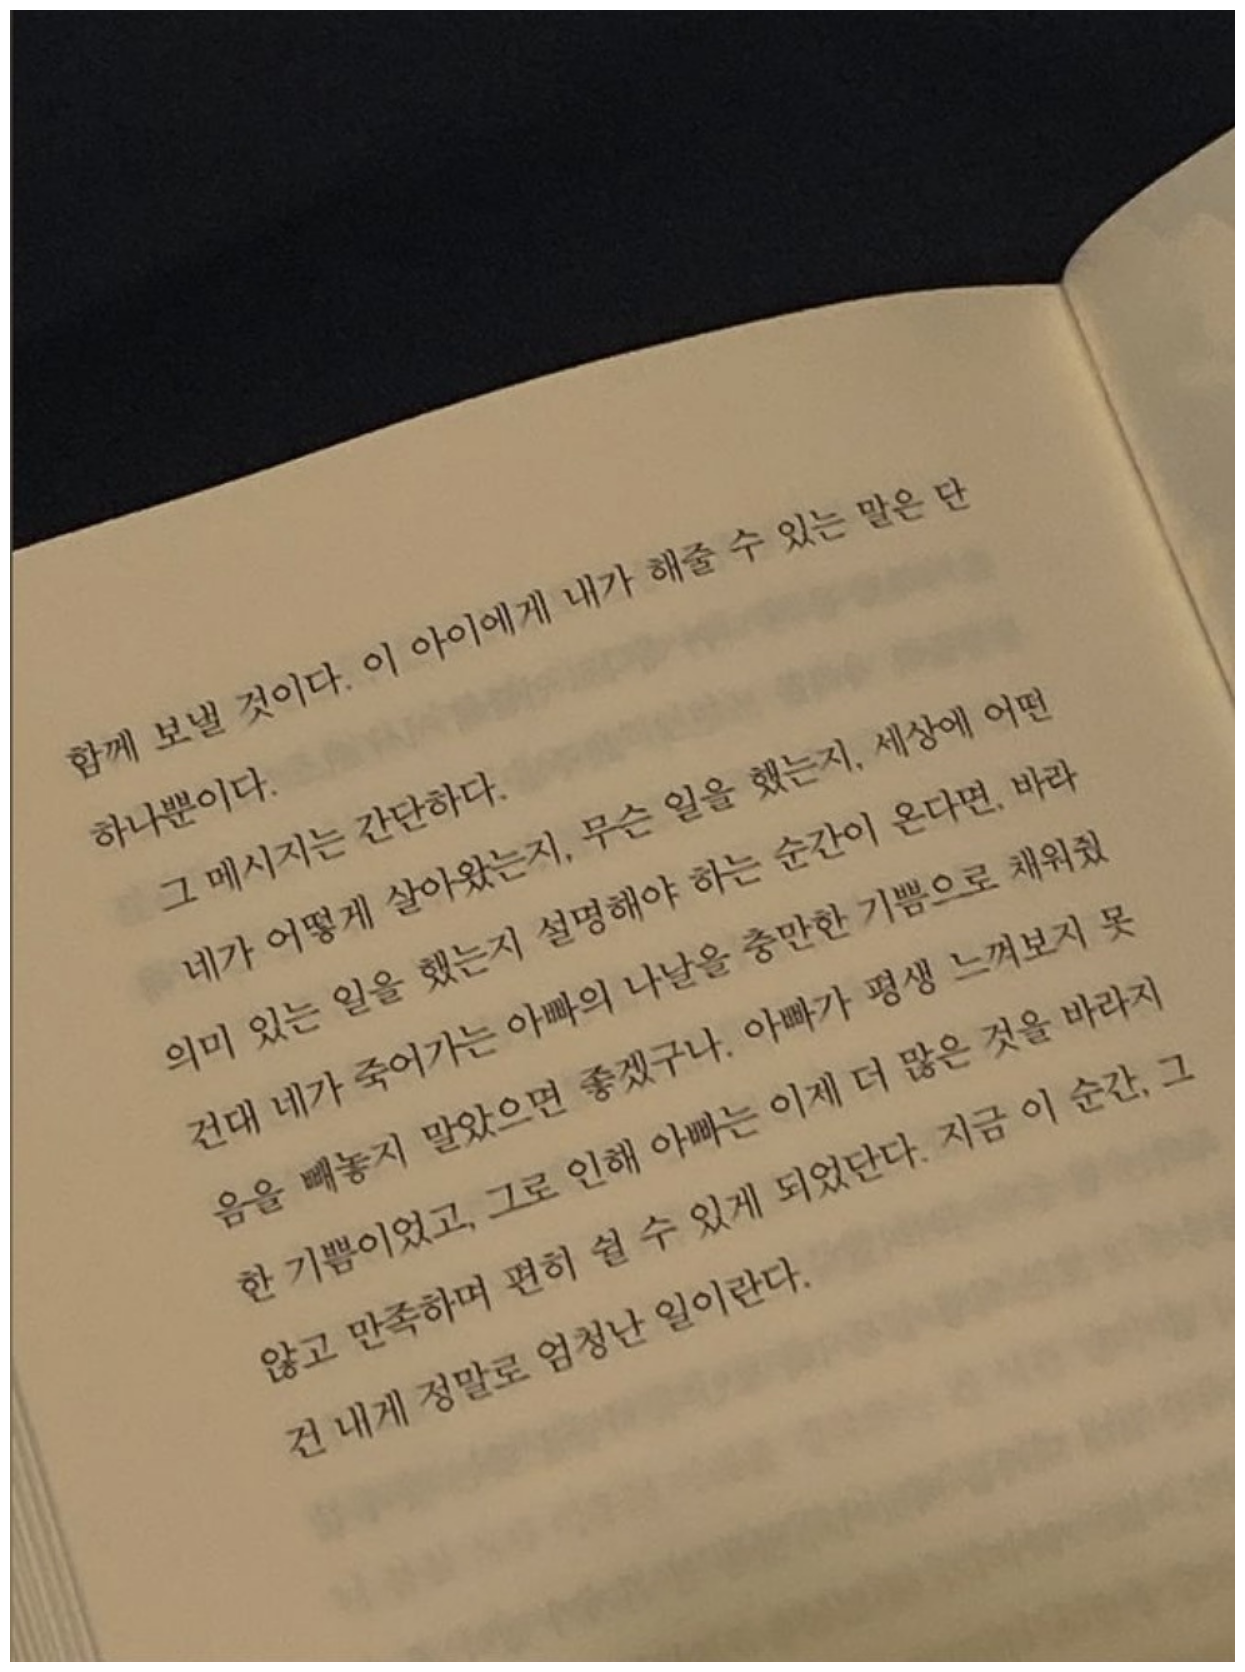

In [39]:
display("temp/rotated_fixed.jpg")

## 7. Removing Borders

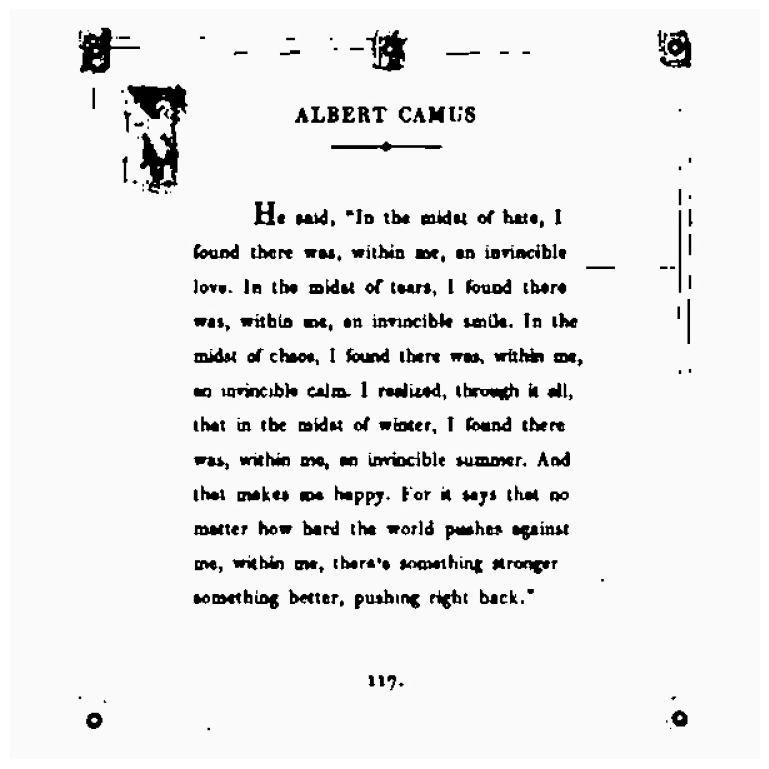

In [40]:
display('temp/no_noise.jpg')

In [41]:
def remove_borders(image):
    contours, heiarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cntsSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntsSorted[-1]
    x, y, w, h = cv2.boundingRect(cnt)
    crop = image[y:y+h, x:x+w]
    return (crop)

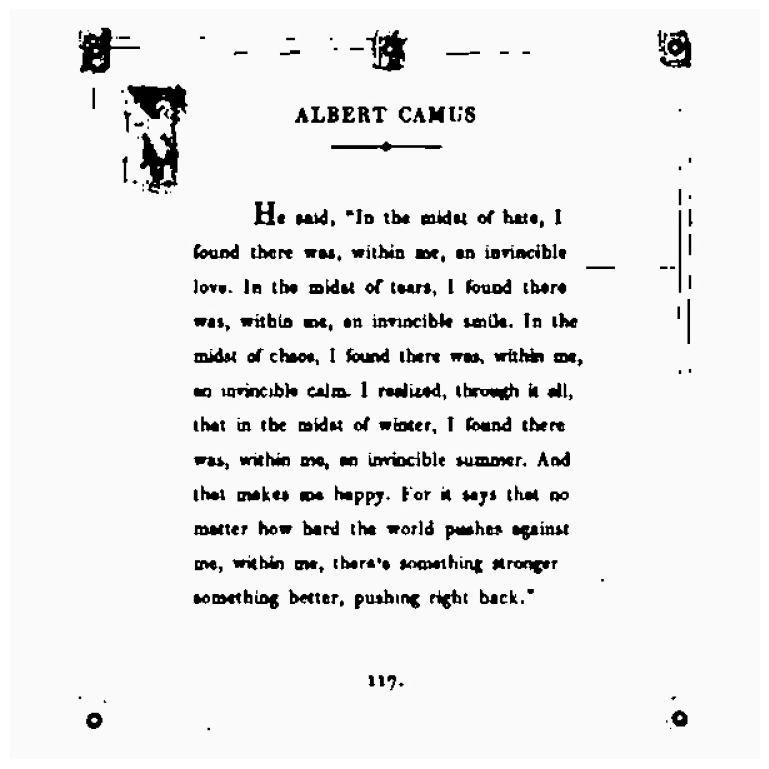

In [42]:
no_borders = remove_borders(no_noise)
cv2.imwrite("temp/no_borders.jpg", no_borders)
display('temp/no_borders.jpg')

## 8. Missing Borders

In [43]:
color = [255, 255, 255]
top, bottom, left, right = [150]*4

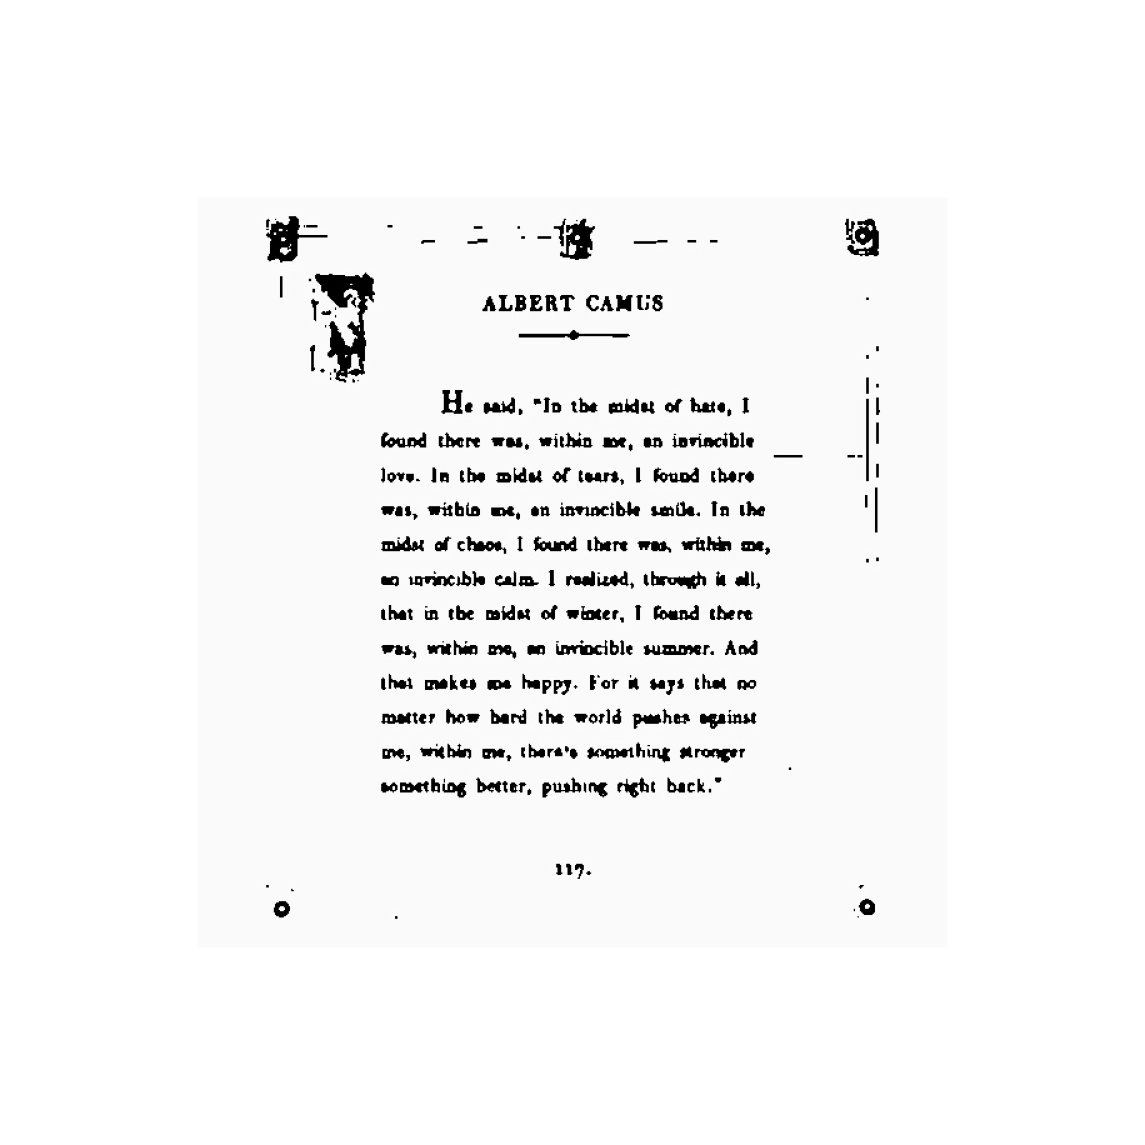

In [44]:
image_with_border = cv2.copyMakeBorder(no_borders, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
cv2.imwrite("temp/image_with_border.jpg", image_with_border)
display("temp/image_with_border.jpg")

## 9. Transparency / Alpha Channel